In [237]:
import csv, os, operator
os.chdir('C:/Users/Erez/Pictures/DSC530Final')
print(os.getcwd())

C:\Users\Erez\Pictures\DSC530Final


In [238]:
from __future__ import print_function, division
import pandas as pd
import numpy as np
import math, statistics
import scipy.stats as stats
import seaborn as sns
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pylab as plt
import thinkstats2
import thinkplot
from pandas.plotting import scatter_matrix
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import EmpiricalCovariance
from sklearn.datasets import make_gaussian_quantiles
%matplotlib inline

In [239]:
def my_stats(frame: pd.DataFrame, target_col: str):
    target = frame[target_col]
    result = pd.Series(dtype=np.float)
    result["std"] = np.nanstd(target)
    result["mean"] = np.nanmean(target)
    result["percentile25"] = np.nanpercentile(target, 25)
    result["median"] = np.nanpercentile(target, 50)
    result["percentile75"] = np.nanpercentile(target, 75)
    result["mode"] = stats.mode(target)
    result["min"] = np.nanmin(target)
    result["max"] = np.nanmax(target)
    result["count"] = target[np.isnan(target) == False].size
    result["kurtosis"] = stats.kurtosis(target)

    return result

In [240]:
data = pd.read_csv("report.csv")

data = data[data.agency_jurisdiction!= 'United States']
df = data[ ["report_year", "agency_jurisdiction", "assaults_percapita", "crimes_percapita", "rapes_percapita", "robberies_percapita", "homicides_percapita"] ]
dfmat = data[ ["report_year", "assaults_percapita", "crimes_percapita", "rapes_percapita", "robberies_percapita", "homicides_percapita"] ]
df = df.copy() # for df slicing warning
dfmat = dfmat.copy()
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

df['State'] = df['agency_jurisdiction'].str.split(', ', expand=True)[1]

In [242]:
# 0 --> always had death penalty
# 1 --> never had death penalty

abolished = {
               "AK": "1",
               "AZ": "0",
               "AR": "0",
               "CA": "0",
               "CO": "0",
               "CT": "2012",
               "DE": "0",
               "DC": "1",
               "FL": "0",
               "GA": "0",
               "HI": "1",
               "ID": "0",
               "IA": "1",
               "IL": "2011",
               "IN": "0",
               "KY": "0",
               "LA": "0",
               "ME": "1",
               "MD": "2013",
               "MI": "1",
               "MN": "0",
               "MS": "0",
               "MO": "0",
               "MT": "0",
               "NV": "0",
               "ND": "1",
               "OK": "0",
               "PA": "0",
               "RI": "1983",
               "SC": "0",
               "TN": "0",
               "UT": "0",
               "VT": "1",
               "VA": "0",
               "WA": "0",
               "WV": "1",
               "WI": "1",
               "WY": "0",
               "DC": "1"
            }
s = df['State']
df['abolished_start'] = s.map(abolished)
#*********************************************
# for testing only
df["abolished_start"] = df["abolished_start"].fillna(0)
#*****************************************
for index, row in df.iterrows():
    # this means always had Death Penalty
    if row["abolished_start"] == "0":
        df.loc[index, 'Legal?'] = True
    elif row["abolished_start"] == "1":
        df.loc[index, 'Legal?'] = False
#*******************************************    
    # special scenario for NE
    # "NE": ["2008", "2009", "2015", "2016"]
    elif row["State"] == "NE":
        if row["report_year"] < 2008:
            df.loc[index, 'Legal?'] = True # yes, it was legal
        if row["report_year"] == 2008:
            df.loc[index, 'Legal?'] = False # wasn't legal
        elif (row["report_year"] >= 2009) and (row["report_year"] < 2015):
            df.loc[index, 'Legal?'] = True # yes, it was legal
        elif row["report_year"] == 2015:
            df.loc[index, 'Legal?'] = False # wasn't legal   
        elif row["report_year"] >= 2016:
            df.loc[index, 'Legal?'] = True # wasn't legal 
#*******************************************    
    # special scenario for AL
    elif row["State"] == "AL":
        if row["report_year"] < 1976:
            df.loc[index, 'Legal?'] = False
        elif row["report_year"] >= 1976:
            df.loc[index, 'Legal?'] = True
#*******************************************    
    # special scenario for NH
    elif row["State"] == "NH":
        if row["report_year"] < 1990:
            df.loc[index, 'Legal?'] = False
        elif row["report_year"] >= 1990:
            df.loc[index, 'Legal?'] = True
#*******************************************    
    # special scenario for MA
    elif row["State"] == "MA":
        if row["report_year"] < 1981:
            df.loc[index, 'Legal?'] = False
        elif (row["report_year"] >= 1981) and (row["report_year"] <= 1984):
            df.loc[index, 'Legal?'] = True # yes, it was legal
        elif row["report_year"] >= 1985:
            df.loc[index, 'Legal?'] = False # wasn't legal   
#*******************************************    
    # special scenario for NC
    elif row["State"] == "NC":
        if row["report_year"] < 1977:
            df.loc[index, 'Legal?'] = False
        elif row["report_year"] >= 1977:
            df.loc[index, 'Legal?'] = True            
#*******************************************    
    # special scenario for NJ
    elif row["State"] == "NJ":
        if row["report_year"] < 1982:
            df.loc[index, 'Legal?'] = False
        elif (row["report_year"] >= 1982) and (row["report_year"] < 2007):
            df.loc[index, 'Legal?'] = True # yes, it was legal
        elif (row["report_year"] >= 2007):
                    df.loc[index, 'Legal?'] = False
#*******************************************    
    # special scenario for NM
    elif row["State"] == "NM":
        if row["report_year"] < 1979:
            df.loc[index, 'Legal?'] = False
        elif (row["report_year"] >= 1979) and (row["report_year"] <= 2008):
            df.loc[index, 'Legal?'] = True # yes, it was legal
        elif (row["report_year"] >= 2009):
                    df.loc[index, 'Legal?'] = False
#*******************************************    
    # special scenario for NY
    elif row["State"] == "NY":
        if row["report_year"] < 1984:
            df.loc[index, 'Legal?'] = True
        elif (row["report_year"] >= 1984) and (row["report_year"] < 1995):
            df.loc[index, 'Legal?'] = False
        elif (row["report_year"] >= 1995) and (row["report_year"] <= 2006):
            df.loc[index, 'Legal?'] = True
        elif (row["report_year"] >= 2007):
                    df.loc[index, 'Legal?'] = False
#*******************************************    
    # special scenario for OH
    elif row["State"] == "OH":
        if row["report_year"] < 1978:
            df.loc[index, 'Legal?'] = True
        elif (row["report_year"] >= 1978) and (row["report_year"] < 1981):
            df.loc[index, 'Legal?'] = False
        elif (row["report_year"] >= 1981):
                    df.loc[index, 'Legal?'] = True
#*******************************************    
    # special scenario for OR
    elif row["State"] == "OR":
        if row["report_year"] < 1981:
            df.loc[index, 'Legal?'] = True
        elif (row["report_year"] >= 1981) and (row["report_year"] < 1984):
            df.loc[index, 'Legal?'] = False
        elif (row["report_year"] >= 1984):
                    df.loc[index, 'Legal?'] = True
#*******************************************    
    # special scenario for KS
    elif row["State"] == "KS":
        if row["report_year"] < 1994:
            df.loc[index, 'Legal?'] = False
        elif row["report_year"] >= 1994:
            df.loc[index, 'Legal?'] = True
#*******************************************    
    # special scenario for SD
    elif row["State"] == "SD":
        if row["report_year"] < 1979:
            df.loc[index, 'Legal?'] = False
        elif (row["report_year"] >= 1979):
                    df.loc[index, 'Legal?'] = True
#*******************************************    
    # special scenario for TX
    elif row["State"] == "TX":
        if row["report_year"] < 1982:
            df.loc[index, 'Legal?'] = False
        elif (row["report_year"] >= 1982):
                    df.loc[index, 'Legal?'] = True                
#*******************************************    
    # special scenario for IL
    elif row["State"] == "IL":
        if row["report_year"] < 2011:
            df.loc[index, 'Legal?'] = True
        elif (row["report_year"] >= 2011):
                    df.loc[index, 'Legal?'] = False
#*******************************************    
    # special scenario for KS
    elif row["State"] == "KS":
        if row["report_year"] < 1994:
            df.loc[index, 'Legal?'] = False
        elif (row["report_year"] >= 1994):
                    df.loc[index, 'Legal?'] = True
#*******************************************    
    # special scenario for MD
    elif row["State"] == "MD":
        if row["report_year"] < 1978:
            df.loc[index, 'Legal?'] = False
        elif (row["report_year"] >= 1978) and (row["report_year"] < 2013):
            df.loc[index, 'Legal?'] = True      
        elif (row["report_year"] >= 2013):
                    df.loc[index, 'Legal?'] = False

del data['agency_code']
del data['violent_crimes']
del data['homicides']
del data['population']
del data['rapes']
del data['assaults']
del data['robberies']
del data['months_reported']
pd.set_option('display.max_columns', None)
print (df.groupby('Legal?').homicides_percapita.mean())

Legal?
False    18.954573
True     14.861042
Name: homicides_percapita, dtype: float64


In [243]:
#df[df['State'] == "MA"]

In [244]:
apcss = df.groupby('Legal?').apply(my_stats, target_col="assaults_percapita")
print("APC Stats: ")
print(apcss)

cpcss = df.groupby('Legal?').apply(my_stats, target_col="crimes_percapita")
print("CPC Stats: ")
print(cpcss)

hpcss = df.groupby('Legal?').apply(my_stats, target_col="homicides_percapita")
print("HPC Stats: ")
print(hpcss)

rapcss = df.groupby('Legal?').apply(my_stats, target_col="rapes_percapita")
print("RAPC Stats: ")
print(rapcss)

ropcss = df.groupby('Legal?').apply(my_stats, target_col="robberies_percapita")
print("ROPC Stats: ")
print(ropcss)

APC Stats: 
               std        mean  percentile25   median  percentile75  \
Legal?                                                                
False   366.615895  487.900948      162.5475  409.355      710.6075   
True    368.071948  580.842141      337.4400  495.170      729.9300   

                   mode    min      max  count  kurtosis  
Legal?                                                    
False   ([874.92], [2])  43.97  1557.61    422 -0.082902  
True    ([428.94], [4])   1.61  2368.22   2331  2.734312  
CPC Stats: 
               std         mean  percentile25   median  percentile75  \
Legal?                                                                 
False   748.375615  1067.541943       432.625  921.145     1616.7775   
True    664.598118  1107.377722       658.975  966.680     1398.0300   

                   mode     min      max  count  kurtosis  
Legal?                                                     
False   ([288.44], [2])  117.48  3702.52    42

In [245]:
Assaults.isna().sum()

assaults_percapita    35
dtype: int64

In [292]:
#apc
yapc = df[df['Legal?']==True]['assaults_percapita']
napc = df[df['Legal?']==False]['assaults_percapita']
yapc_mean = df[df['Legal?']==True]['assaults_percapita'].mean()
napc_mean = df[df['Legal?']==False]['assaults_percapita'].mean()
yapc_std = df[df['Legal?']==True]['assaults_percapita'].std()
napc_std = df[df['Legal?']==False]['assaults_percapita'].std()
Assaults = df[ ["assaults_percapita"] ]
apc_std = yapc_std+napc_std

#cpc
ycpc = df[df['Legal?']==True]['crimes_percapita']
ncpc = df[df['Legal?']==False]['crimes_percapita']
ycpc_mean = df[df['Legal?']==True]['crimes_percapita'].mean()
ncpc_mean = df[df['Legal?']==False]['crimes_percapita'].mean()
ycpc_std = df[df['Legal?']==True]['crimes_percapita'].std()
ncpc_std = df[df['Legal?']==False]['crimes_percapita'].std()
Crimes = df[ ["crimes_percapita"] ]
cpc_std = ycpc_std+ncpc_std

#hpc
yhpc = df[df['Legal?']==True]['homicides_percapita']
nhpc = df[df['Legal?']==False]['homicides_percapita']
yhpc_mean = df[df['Legal?']==True]['homicides_percapita'].mean()
nhpc_mean = df[df['Legal?']==False]['homicides_percapita'].mean()
yhpc_std = df[df['Legal?']==True]['homicides_percapita'].std()
nhpc_std = df[df['Legal?']==False]['homicides_percapita'].std()
Homicides = df[ ["homicides_percapita"] ]
hpc_std = yhpc_std+nhpc_std

#rapc
yrapc = df[df['Legal?']==True]['rapes_percapita']
nrapc = df[df['Legal?']==False]['rapes_percapita']
yrapc_mean = df[df['Legal?']==True]['rapes_percapita'].mean()
nrapc_mean = df[df['Legal?']==False]['rapes_percapita'].mean()
yrapc_std = df[df['Legal?']==True]['rapes_percapita'].std()
nrapc_std = df[df['Legal?']==False]['rapes_percapita'].std()
Rapes = df[ ["rapes_percapita"] ]
rapc_std = yrapc_std+nrapc_std

#ropc
yrapc = df[df['Legal?']==True]['robberies_percapita']
nrapc = df[df['Legal?']==False]['robberies_percapita']
yropc_mean = df[df['Legal?']==True]['robberies_percapita'].mean()
nropc_mean = df[df['Legal?']==False]['robberies_percapita'].mean()
yropc_std = df[df['Legal?']==True]['robberies_percapita'].std()
nropc_std = df[df['Legal?']==False]['robberies_percapita'].std()
Robberies = df[ ["robberies_percapita"] ]
ropc_std = yropc_std+nropc_std

#Year
Year = df[ ["report_year"] ]

In [291]:
#n
n_True = df[df['Legal?']==True].shape[0]
n_False = df[df['Legal?']==False].shape[0]
n_sq = math.sqrt(n_True+n_False)

#T=Test
degrees_of_freedom = Year.shape[0]-1
alpha = 0.05
one_tailed_test_prob_tail = alpha
t_critical = round(stats.t.ppf(one_tailed_test_prob_tail, degrees_of_freedom), 3)
print("The T Critical Value is: " + str(t_critical))

The T Critical Value is: -1.645


In [250]:
#apc
apcind_test = stats.ttest_ind(df[df['Legal?']==False]['assaults_percapita'],df[df['Legal?']==True]['assaults_percapita'])
print("APC T Test: ")
print(apcind_test)
apc_se = math.sqrt(((n_True-1)*(yapc_std**2) + (n_False-1)*(napc_std**2))/(n_True+n_False-2))
print(apc_se)

APC T Test: 
Ttest_indResult(statistic=-4.774247811566674, pvalue=1.898207154205071e-06)
367.98281803528414


In [295]:
#apc
apcind_test = stats.ttest_ind(df[df['Legal?']==False]['assaults_percapita'],df[df['Legal?']==True]['assaults_percapita'])
print("APC T Test: ")
print(apcind_test)
apc_se = apc_std/n_sq
print(apc_se)

APC T Test: 
Ttest_indResult(statistic=-4.774247811566674, pvalue=1.898207154205071e-06)
14.012110634240397


In [296]:
#cpc
cpcind_test = stats.ttest_ind(df[df['Legal?']==False]['crimes_percapita'],df[df['Legal?']==True]['crimes_percapita'])
print("CPC T Test: ")
print(cpcind_test)
cpc_se = cpc_std/n_sq
print(cpc_se)

CPC T Test: 
Ttest_indResult(statistic=-1.110038966487317, pvalue=0.2670792531479211)
26.949314408000056


In [297]:
#hpc
hpcind_test = stats.ttest_ind(df[df['Legal?']==False]['homicides_percapita'],df[df['Legal?']==True]['homicides_percapita'])
print("HPC T Test: ")
print(hpcind_test)
hpc_se = hpc_std/n_sq
print(hpc_se)

HPC T Test: 
Ttest_indResult(statistic=6.28381626383767, pvalue=3.828282829571985e-10)
0.5348339241289535


In [298]:
#rapc
rapcind_test = stats.ttest_ind(df[df['Legal?']==False]['rapes_percapita'],df[df['Legal?']==True]['rapes_percapita'])
print("RAPC T Test: ")
print(rapcind_test)
rapc_se = rapc_std/n_sq
print(rapc_se)

RAPC T Test: 
Ttest_indResult(statistic=-4.753095604586784, pvalue=2.1062866743482176e-06)
1.2165257430716194


In [299]:
#ropc
ropcind_test = stats.ttest_ind(df[df['Legal?']==False]['robberies_percapita'],df[df['Legal?']==True]['robberies_percapita'])
print("ROPC T Test: ")
print(ropcind_test)
ropc_se = ropc_std/n_sq
print(ropc_se)

ROPC T Test: 
Ttest_indResult(statistic=3.1665011862097727, pvalue=0.0015597317306086872)
13.960349599136519


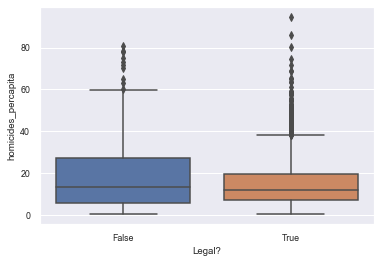

In [258]:
sns.boxplot(x=df['Legal?'], y=df['homicides_percapita'])

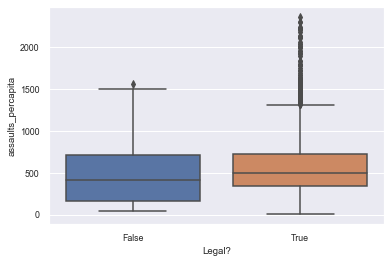

In [259]:
sns.boxplot(x=df['Legal?'], y=df['assaults_percapita'])

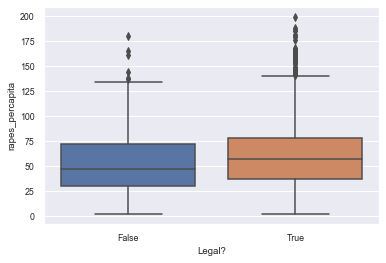

In [260]:
sns.boxplot(x=df['Legal?'], y=df['rapes_percapita'])

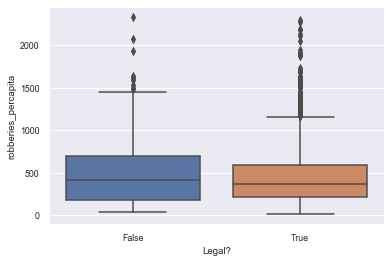

In [261]:
sns.boxplot(x=df['Legal?'], y=df['robberies_percapita'])

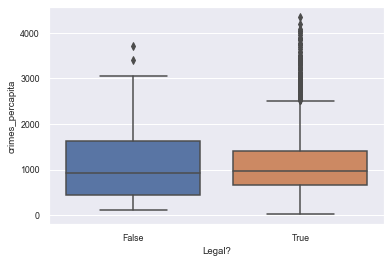

In [262]:
sns.boxplot(x=df['Legal?'], y=df['crimes_percapita'])

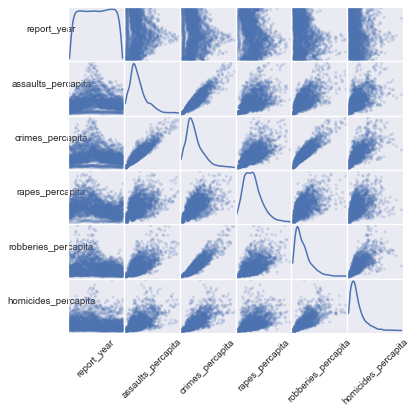

In [263]:
dfhist = data[ ["report_year", "assaults_percapita", "crimes_percapita", "rapes_percapita", "robberies_percapita", "homicides_percapita"]]
dfhist = dfhist.copy() 
dfhist.dropna()
dfscatter = pd.DataFrame(dfhist, columns=['Year', 'Assaults Per Capita', 'Crimes Per Capita', 'Rapes Per Capita', 'Robberies Per Capita', 'Homicides Per Capita'])

sm = scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.3,0.5) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()              

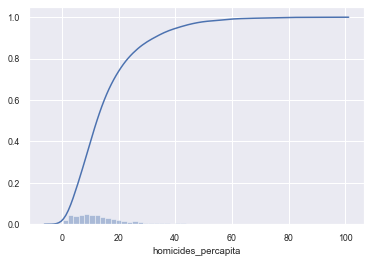

In [264]:
sns.distplot(df['homicides_percapita'], kde_kws={'cumulative': True})

In [288]:
cpc_log = np.log(Crimes)
print (cpc_log.head)


<bound method NDFrame.head of       crimes_percapita
0             6.724457
1             5.510036
2             7.400889
3             6.261034
4             6.002553
...                ...
2823          6.485398
2824          6.806354
2825          4.929064
2826          7.092216
2827          6.892439

[2753 rows x 1 columns]>


In [266]:
yhpc_dropna = yhpc.dropna()
print('When Legal = True', len(yhpc), len(yhpc_dropna))
 
nhpc_dropna = nhpc.dropna()
print('When Legal = False', len(nhpc), len(nhpc_dropna))

yhpc_pmf = thinkstats2.Pmf(yhpc_dropna, label='Legal = True')
nhpc_pmf = thinkstats2.Pmf(nhpc_dropna, label='Legal = False')

When Legal = True 2331 2331
When Legal = False 422 422


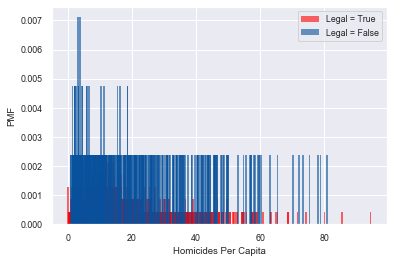

In [267]:
width = 1 / 2
thinkplot.PrePlot(2)
thinkplot.Hist(yhpc_pmf, align='right', width=width, color='#FF0000')
thinkplot.Hist(nhpc_pmf, align='left', width=width)
thinkplot.Config(xlabel='Homicides Per Capita', ylabel='PMF')

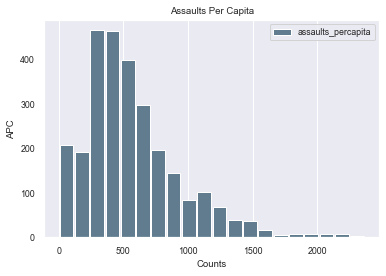

In [269]:
apchist = data[ ["assaults_percapita"] ]
apchist.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Assaults Per Capita')
plt.xlabel('Counts')
plt.ylabel('APC')
plt.grid(axis='y')

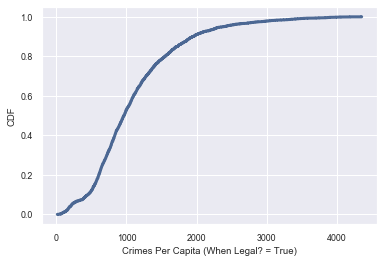

In [270]:
cdf = thinkstats2.Cdf(ycpc)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Crimes Per Capita (When Legal? = True)', ylabel='CDF')

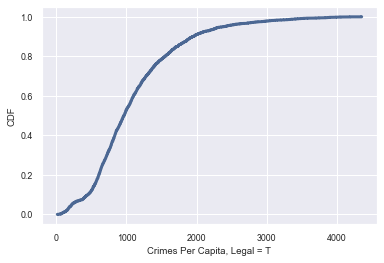

In [271]:
cdf = thinkstats2.Cdf(ycpc)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Crimes Per Capita, Legal = T', ylabel='CDF')

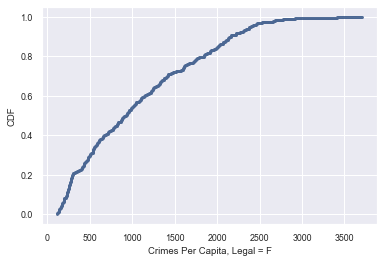

In [272]:
cdf = thinkstats2.Cdf(ncpc)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Crimes Per Capita, Legal = F', ylabel='CDF')

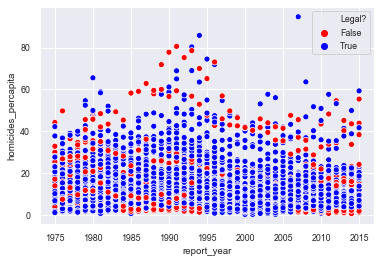

In [273]:
sns.scatterplot(data=df, x="report_year", y="homicides_percapita", hue="Legal?", palette=['red','blue'])

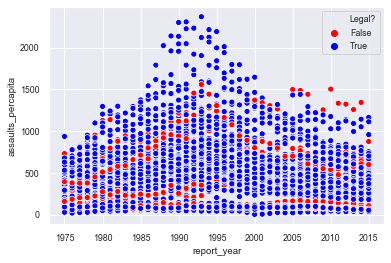

In [274]:
sns.scatterplot(data=df, x="report_year", y="assaults_percapita", hue="Legal?", palette=['red','blue'])

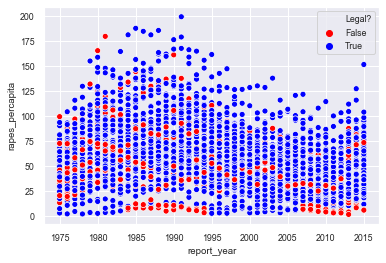

In [275]:
sns.scatterplot(data=df, x="report_year", y="rapes_percapita", hue="Legal?", palette=['red','blue'])

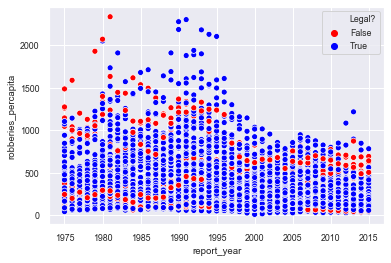

In [276]:
sns.scatterplot(data=df, x="report_year", y="robberies_percapita", hue="Legal?", palette=['red','blue'])

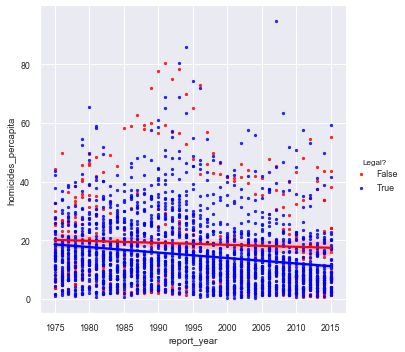

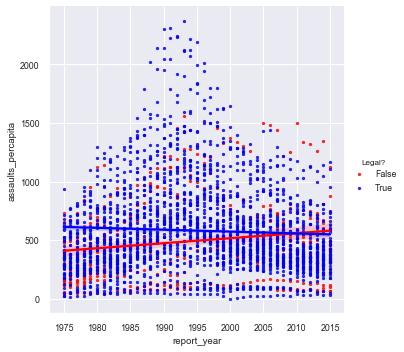

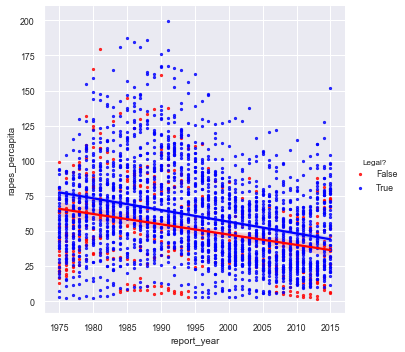

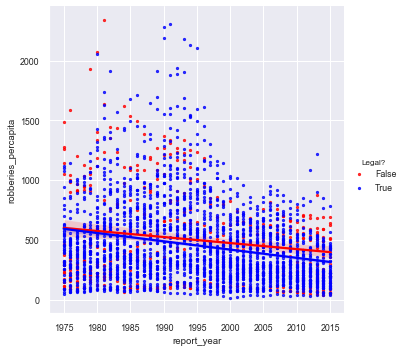

In [277]:
sns.lmplot(data=df, x="report_year", y="homicides_percapita", hue="Legal?",palette=['red','blue'], scatter_kws={"s": 5})
sns.lmplot(data=df, x="report_year", y="assaults_percapita", hue="Legal?",palette=['red','blue'], scatter_kws={"s": 5})
sns.lmplot(data=df, x="report_year", y="rapes_percapita", hue="Legal?",palette=['red','blue'], scatter_kws={"s": 5})
sns.lmplot(data=df, x="report_year", y="robberies_percapita", hue="Legal?",palette=['red','blue'], scatter_kws={"s": 5})

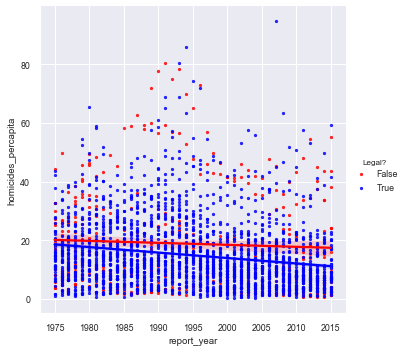

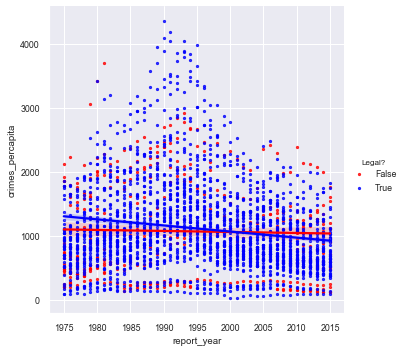

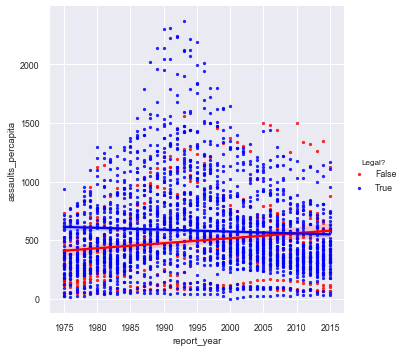

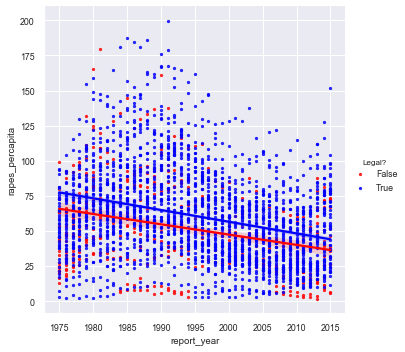

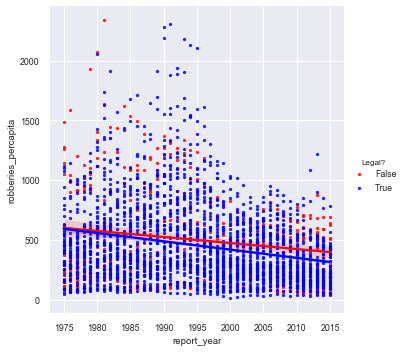

In [278]:
#multiple regression

xvar = df[['report_year','Legal?']]
yvar = df[['homicides_percapita', 'crimes_percapita', 'assaults_percapita', 'rapes_percapita', 'robberies_percapita']]
regr = linear_model.LinearRegression()
regr=regr.fit(xvar, yvar)
regr.coef_

ylist = ['homicides_percapita', 'crimes_percapita', 'assaults_percapita', 'rapes_percapita', 'robberies_percapita']
for column in ylist:
    sns.lmplot(data=df, x="report_year", y=column, hue="Legal?",palette=['red','blue'], scatter_kws={"s": 5})



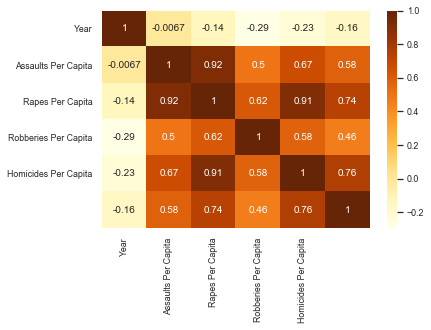

In [279]:
#CorrelationAnalysis
corrMatrix = df.corr()
labels = ['Year', 'Assaults Per Capita', 'Rapes Per Capita', 'Robberies Per Capita', 'Homicides Per Capita']
sns.heatmap(corrMatrix, annot=True, cmap='YlOrBr',
            xticklabels=labels,
            yticklabels=labels)

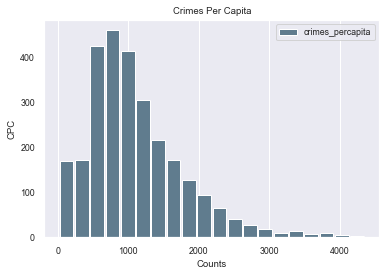

In [281]:
cpchist = df[ ["crimes_percapita"] ]
cpchist.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Crimes Per Capita')
plt.xlabel('Counts')
plt.ylabel('CPC')
plt.grid(axis='y')

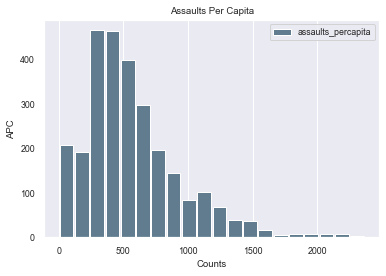

In [282]:
apchist = df[ ["assaults_percapita"] ]
apchist.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Assaults Per Capita')
plt.xlabel('Counts')
plt.ylabel('APC')
plt.grid(axis='y')

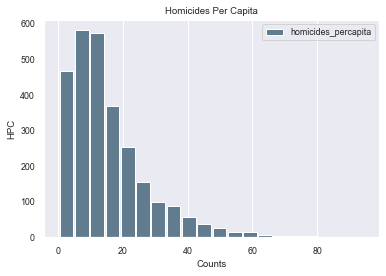

In [283]:
hpchist = df[ ["homicides_percapita"] ]
hpchist.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Homicides Per Capita')
plt.xlabel('Counts')
plt.ylabel('HPC')
plt.grid(axis='y')

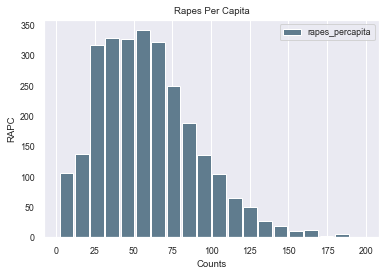

In [284]:
rapchist = df[ ["rapes_percapita"] ]
rapchist.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Rapes Per Capita')
plt.xlabel('Counts')
plt.ylabel('RAPC')
plt.grid(axis='y')

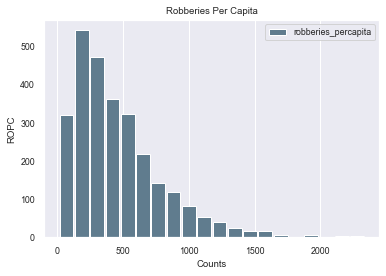

In [285]:
ropchist = df[ ["robberies_percapita"] ]
ropchist.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Robberies Per Capita')
plt.xlabel('Counts')
plt.ylabel('ROPC')
plt.grid(axis='y')

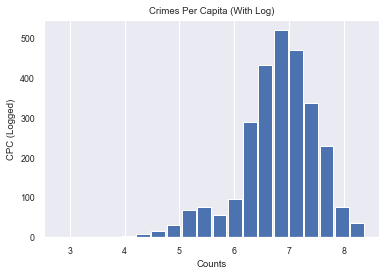

In [286]:
cpc_log = np.log(df['crimes_percapita'])
cpc_log.plot.hist(grid=True, bins=20, rwidth=0.9)
plt.title('Crimes Per Capita (With Log)')
plt.xlabel('Counts')
plt.ylabel('CPC (Logged)')
plt.grid(axis='y')